# Diabetes Prediction with Python Object-Oriented Programming (OOP)
This notebook explores the diabetes prediction dataset, performing exploratory data analysis (EDA) to understand the data distribution, relationships, and potential predictive features.

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

## Dataset Overview
The dataset contains various health-related attributes of patients, along with a target variable indicating whether the patient has diabetes. The goal is to build a predictive model to classify patients based on these attributes.

In [38]:
# Class for managing the patients

class PatientDataset:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        self.features = None
        self.labels = None
        self.load_data()

    def load_data(self):
        """Load and validate the dataset"""
        try:
            self.data = pd.read_csv(self.file_path)
            print(f"Dataset loaded successfully with {self.data.shape[0]} rows and {self.data.shape[1]} columns")
        except FileNotFoundError:
            raise FileNotFoundError(f"The file {self.file_path} was not found.")
        except Exception as e:
            raise Exception(f"Error loading dataset: {str(e)}")

    def validate_data(self):
        """Validate data quality and completeness"""
        if self.data is None:
            raise ValueError("Dataset not loaded. Call load_data() first.")

        # Check for required columns
        required_columns = ['diabetes']  # Add other required columns
        missing_columns = [col for col in required_columns if col not in self.data.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {missing_columns}")

        # Check for data types
        if not isinstance(self.data['diabetes'], (pd.Series, np.ndarray)):
            raise TypeError("Target column 'diabetes' has incorrect type")

    def clean_data(self):
        """Clean the dataset"""
        # Remove duplicates
        self.data = self.data.drop_duplicates()

        # Handle missing values
        if self.data.isnull().values.any():
            print("Warning: Dataset contains missing values")
            # Fill numeric columns with median
            numeric_columns = self.data.select_dtypes(include=[np.number]).columns
            self.data[numeric_columns] = self.data[numeric_columns].fillna(self.data[numeric_columns].median())

            # Fill categorical columns with mode
            categorical_columns = self.data.select_dtypes(exclude=[np.number]).columns
            self.data[categorical_columns] = self.data[categorical_columns].fillna(self.data[categorical_columns].mode().iloc[0])
        print("Data cleaned successfully")

    def display_head(self):
        return self.data.head()

    def display_info(self):
        return self.data.info()

    def display_description(self):
        return self.data.describe()

    def prepare_data(self):
        # Check for missing values
        if self.data.isnull().values.any():
            raise ValueError("Dataset contains missing values. Please handle them before proceeding.")

        # Encode categorical variables if any
        le = LabelEncoder()

        cat_columns = self.data.select_dtypes(include=['object', 'category']).columns.tolist()
        for col in cat_columns:
            self.data[col] = le.fit_transform(self.data[col])

        # Separate features and labels
        self.features = self.data.drop(columns=['diabetes'])
        self.labels = self.data['diabetes']

    def get_train_test_split(self, test_size=0.2, random_state=42):
        if self.features is None or self.labels is None:
            raise ValueError("Data not prepared. Call prepare_data() first.")
        return train_test_split(self.features, self.labels, test_size=test_size, random_state=random_state)

    # Exploratory Data Analysis (EDA) methods
    def perform_eda(self):
        """Perform exploratory data analysis on the dataset"""
        # Plot feature distributions
        self._plot_feature_distribution(self.features.columns)

        # Plot correlation matrix
        self._plot_correlation_matrix()

    def _plot_feature_distribution(self, features):
        for feature in features:
            plt.figure(figsize=(8, 4))
            sns.histplot(self.data[feature], kde=True)
            plt.title(f'Distribution of {feature}')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.show()

    def _plot_correlation_matrix(self):
        plt.figure(figsize=(12, 8))
        sns.heatmap(self.data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()


## Class for the Decision Tree Model
This class encapsulates the functionality of a Decision Tree Classifier for diabetes prediction. It includes methods for training the model, making predictions, evaluating performance, and visualizing results.

In [34]:
# Class for the Decision tree model

class DiabetesDecisionTreeModel:
    def __init__(self, max_depth=5):
        # Initialize the Decision Tree Classifier
        self.model = DecisionTreeClassifier(max_depth= max_depth,random_state=42)

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, y_test, y_pred):
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        return accuracy, conf_matrix, class_report

    def plot_confusion_matrix(self, y_test, y_pred):
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    def plot_tree(self):
        plt.figure(figsize=(12, 8))
        plot_tree(self.model, filled=True)
        plt.title("Decision Tree for Diabetes Prediction")
        plt.show()

## Application Class
This class serves as the main application for diabetes prediction, integrating the dataset management and model functionalities.
It prepares the data, trains the model, makes predictions, evaluates performance, and visualizes results.
It can be executed to run the entire diabetes prediction workflow.
This class is designed to be reusable and modular, allowing for easy integration into larger applications or systems.
It encapsulates the entire workflow from data preparation to model evaluation, making it easy to use and extend.
It can be instantiated with a dataset path, and the `run` method can be called to execute the entire process.

This design follows the principles of object-oriented programming (OOP), promoting code reusability, modularity, and separation of concerns.

In [39]:
# Class for the Application

class DiabetesPredictionApp:
    def __init__(self, dataset_path):
        self.dataset = PatientDataset(dataset_path)
        self.dataset.prepare_data()
        self.X_train, self.X_test, self.y_train, self.y_test = self.dataset.get_train_test_split()
        self.model = DiabetesDecisionTreeModel()

    def run(self):
        # Perform exploratory data analysis
        self.dataset.perform_eda()
        # Train the model
        self.model.train(self.X_train, self.y_train)
        # Make predictions
        y_pred = self.model.predict(self.X_test)
        # Evaluate the model
        accuracy, conf_matrix, class_report = self.model.evaluate(self.y_test, y_pred)

        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:")
        print(class_report)

        # Plot the confusion matrix
        self.model.plot_confusion_matrix(self.y_test, y_pred)
        # Plot the decision tree
        self.model.plot_tree()

## Exploration of the Dataset
This section demonstrates how to instantiate the `PatientDataset` class, display the dataset's head and information, and then run the `DiabetesPredictionApp` to execute the entire diabetes prediction workflow.

In [40]:
# Instantiate the PatientDataset class
diabetes_data = PatientDataset('../data/diabetes_prediction_dataset.csv')
# Display the first few rows of the dataset
diabetes_data.display_head()
# Display dataset information
diabetes_data.display_info()

Dataset loaded successfully with 100000 rows and 9 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Execution of the Application
This section runs the entire diabetes prediction application, which includes data preparation, model training, evaluation, and visualization.

Dataset loaded successfully with 100000 rows and 9 columns


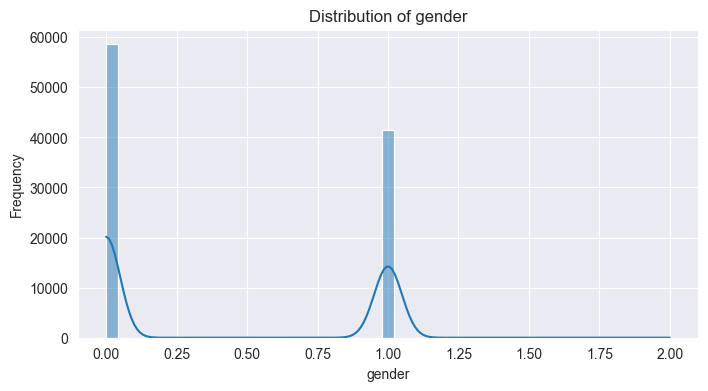

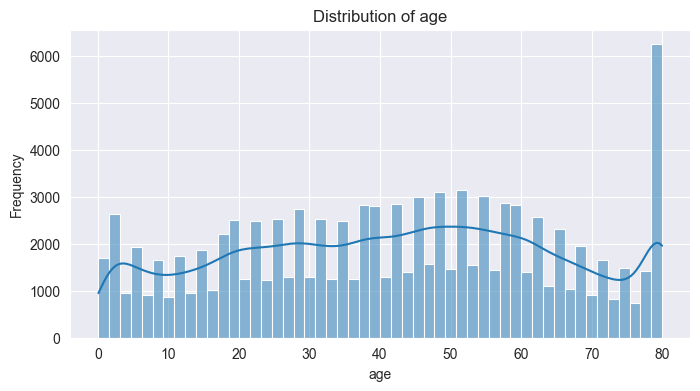

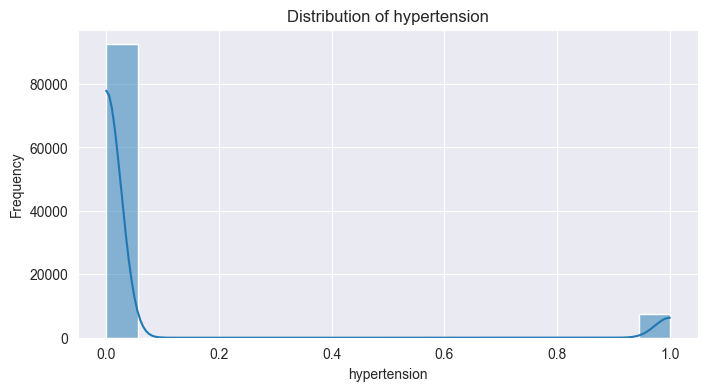

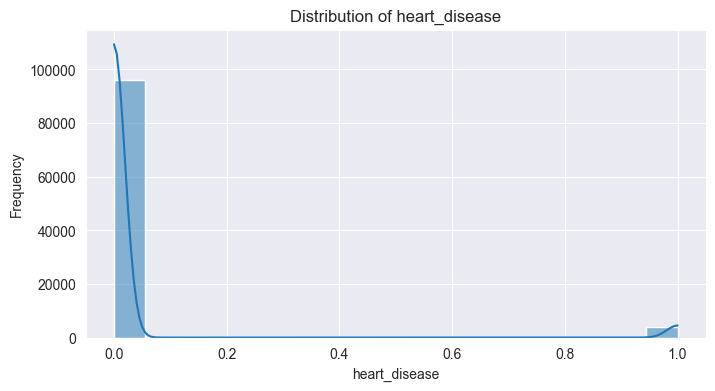

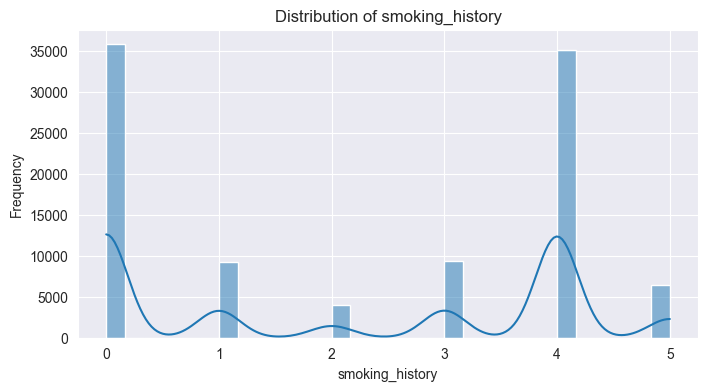

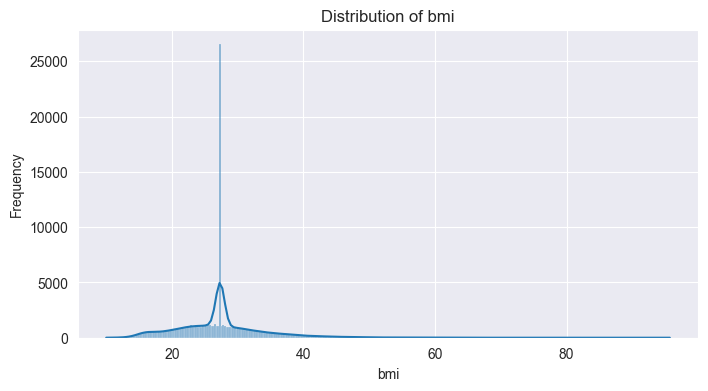

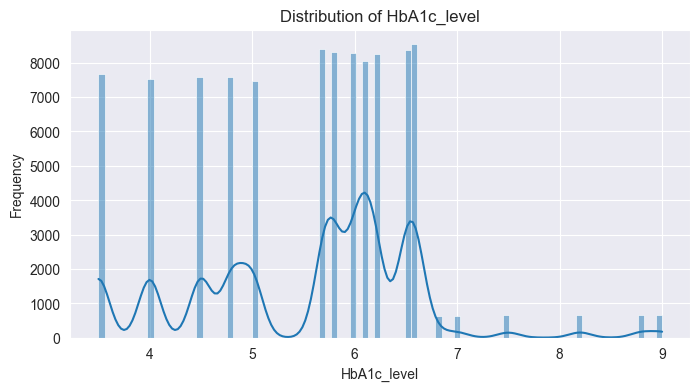

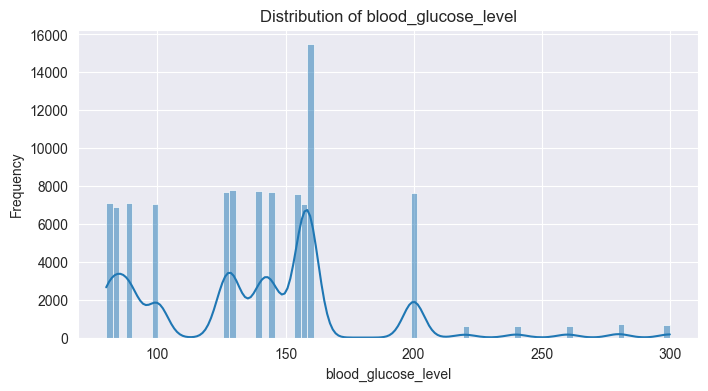

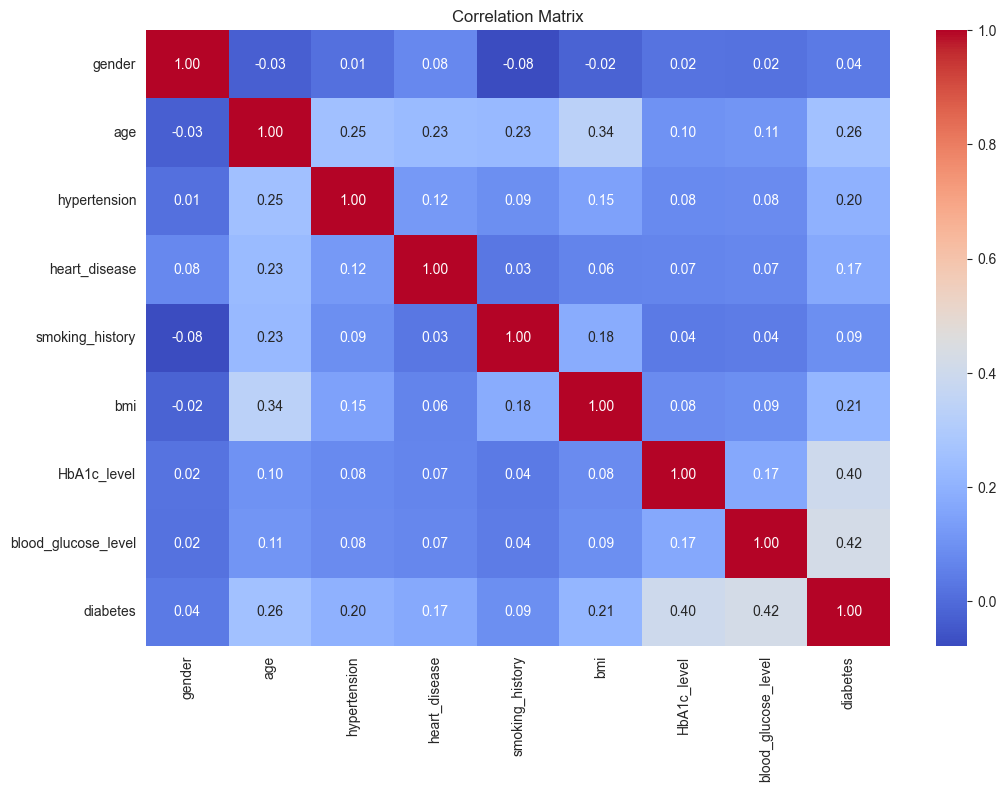

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



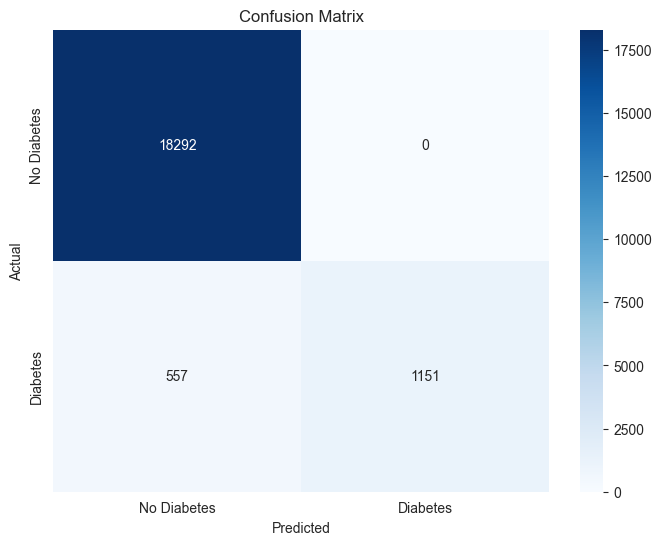

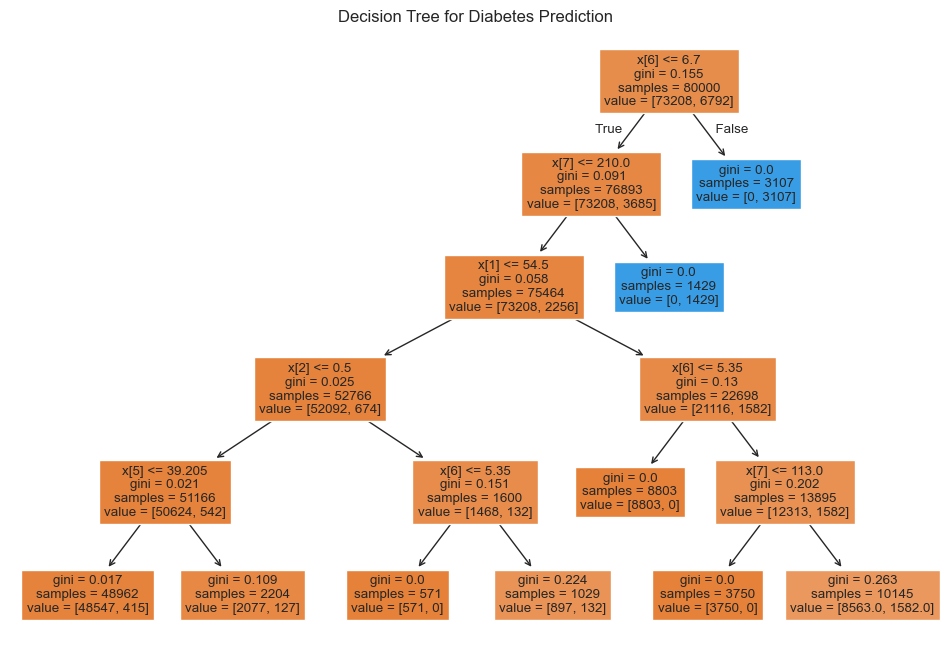

In [41]:
# Execute the application
app = DiabetesPredictionApp('../data/diabetes_prediction_dataset.csv')
app.run()